<a href="https://colab.research.google.com/github/agarwalarpit99/Deep-Learning-projects/blob/master/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arpitkumaragarwal","key":"f53e388348af4c75f8d2d0e42bac13cf"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c diabetes

  0% 0.00/33.7k [00:00<?, ?B/s]
100% 33.7k/33.7k [00:00<00:00, 11.9MB/s]
  0% 0.00/52.0k [00:00<?, ?B/s]
100% 52.0k/52.0k [00:00<00:00, 54.1MB/s]


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv('train.csv')

In [0]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,2,138,62,35,0,33.6,0.127,47,1,0
1,0,135,68,42,250,42.3,0.365,24,1,3
2,0,173,78,32,265,46.5,1.159,58,0,5
3,4,99,72,17,0,25.6,0.294,28,0,6
4,8,194,80,0,0,26.1,0.551,67,0,7


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1405 non-null   int64  
 1   Glucose                   1405 non-null   int64  
 2   BloodPressure             1405 non-null   int64  
 3   SkinThickness             1405 non-null   int64  
 4   Insulin                   1405 non-null   int64  
 5   BMI                       1405 non-null   float64
 6   DiabetesPedigreeFunction  1405 non-null   float64
 7   Age                       1405 non-null   int64  
 8   Outcome                   1405 non-null   int64  
 9   Id                        1405 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 109.9 KB


In [0]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,3.667616,121.185765,69.585765,20.725979,79.928826,32.182705,0.477732,33.300356,0.346619,997.713167
std,3.286615,32.797494,18.648207,16.013738,112.640267,7.810333,0.338181,11.976510,0.476063,576.252545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000,496.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.300000,0.376000,29.000000,0.000000,1001.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.631000,41.000000,1.000000,1499.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,80.600000,2.420000,81.000000,1.000000,1999.000000


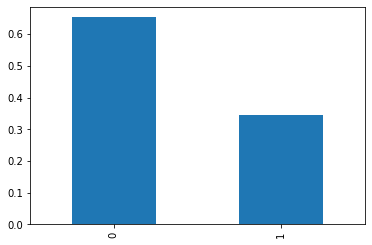

In [0]:
data['Outcome'].value_counts(normalize=True).plot.bar()

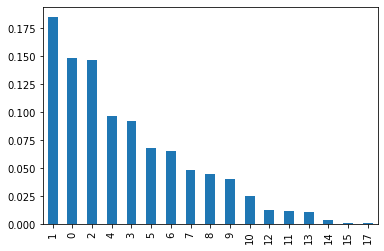

In [0]:
#Univariate analysis
data['Pregnancies'].value_counts(normalize=True).plot.bar()

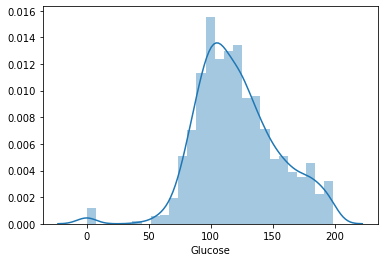

In [0]:
sns.distplot(data['Glucose'])

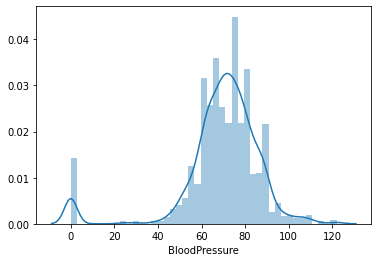

In [0]:
sns.distplot(data['BloodPressure'])

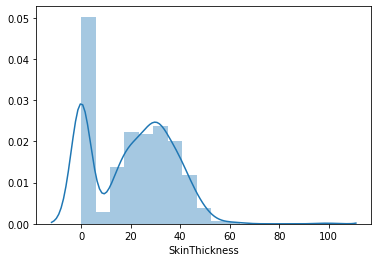

In [0]:
sns.distplot(data['SkinThickness'])

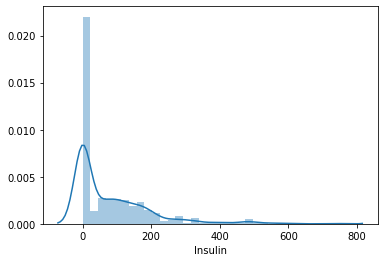

In [0]:
sns.distplot(data['Insulin'])

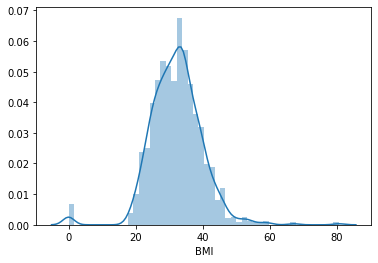

In [0]:
sns.distplot(data['BMI'])

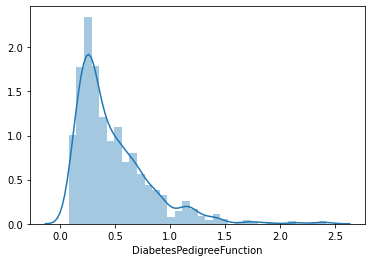

In [0]:
sns.distplot(data['DiabetesPedigreeFunction'])

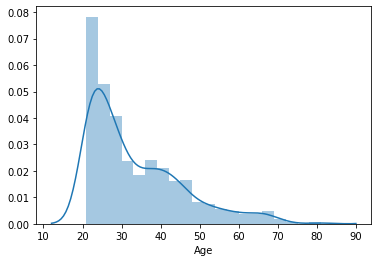

In [0]:
sns.distplot(data['Age'])

#data inferred
1.We have inbalanced data i.e 65% of the people does not have diabetes and 35% has diabetes.
2.Pregrancies have between 1 to 5 mostly
3.Most people either have low skinthickness or have high skinthickness


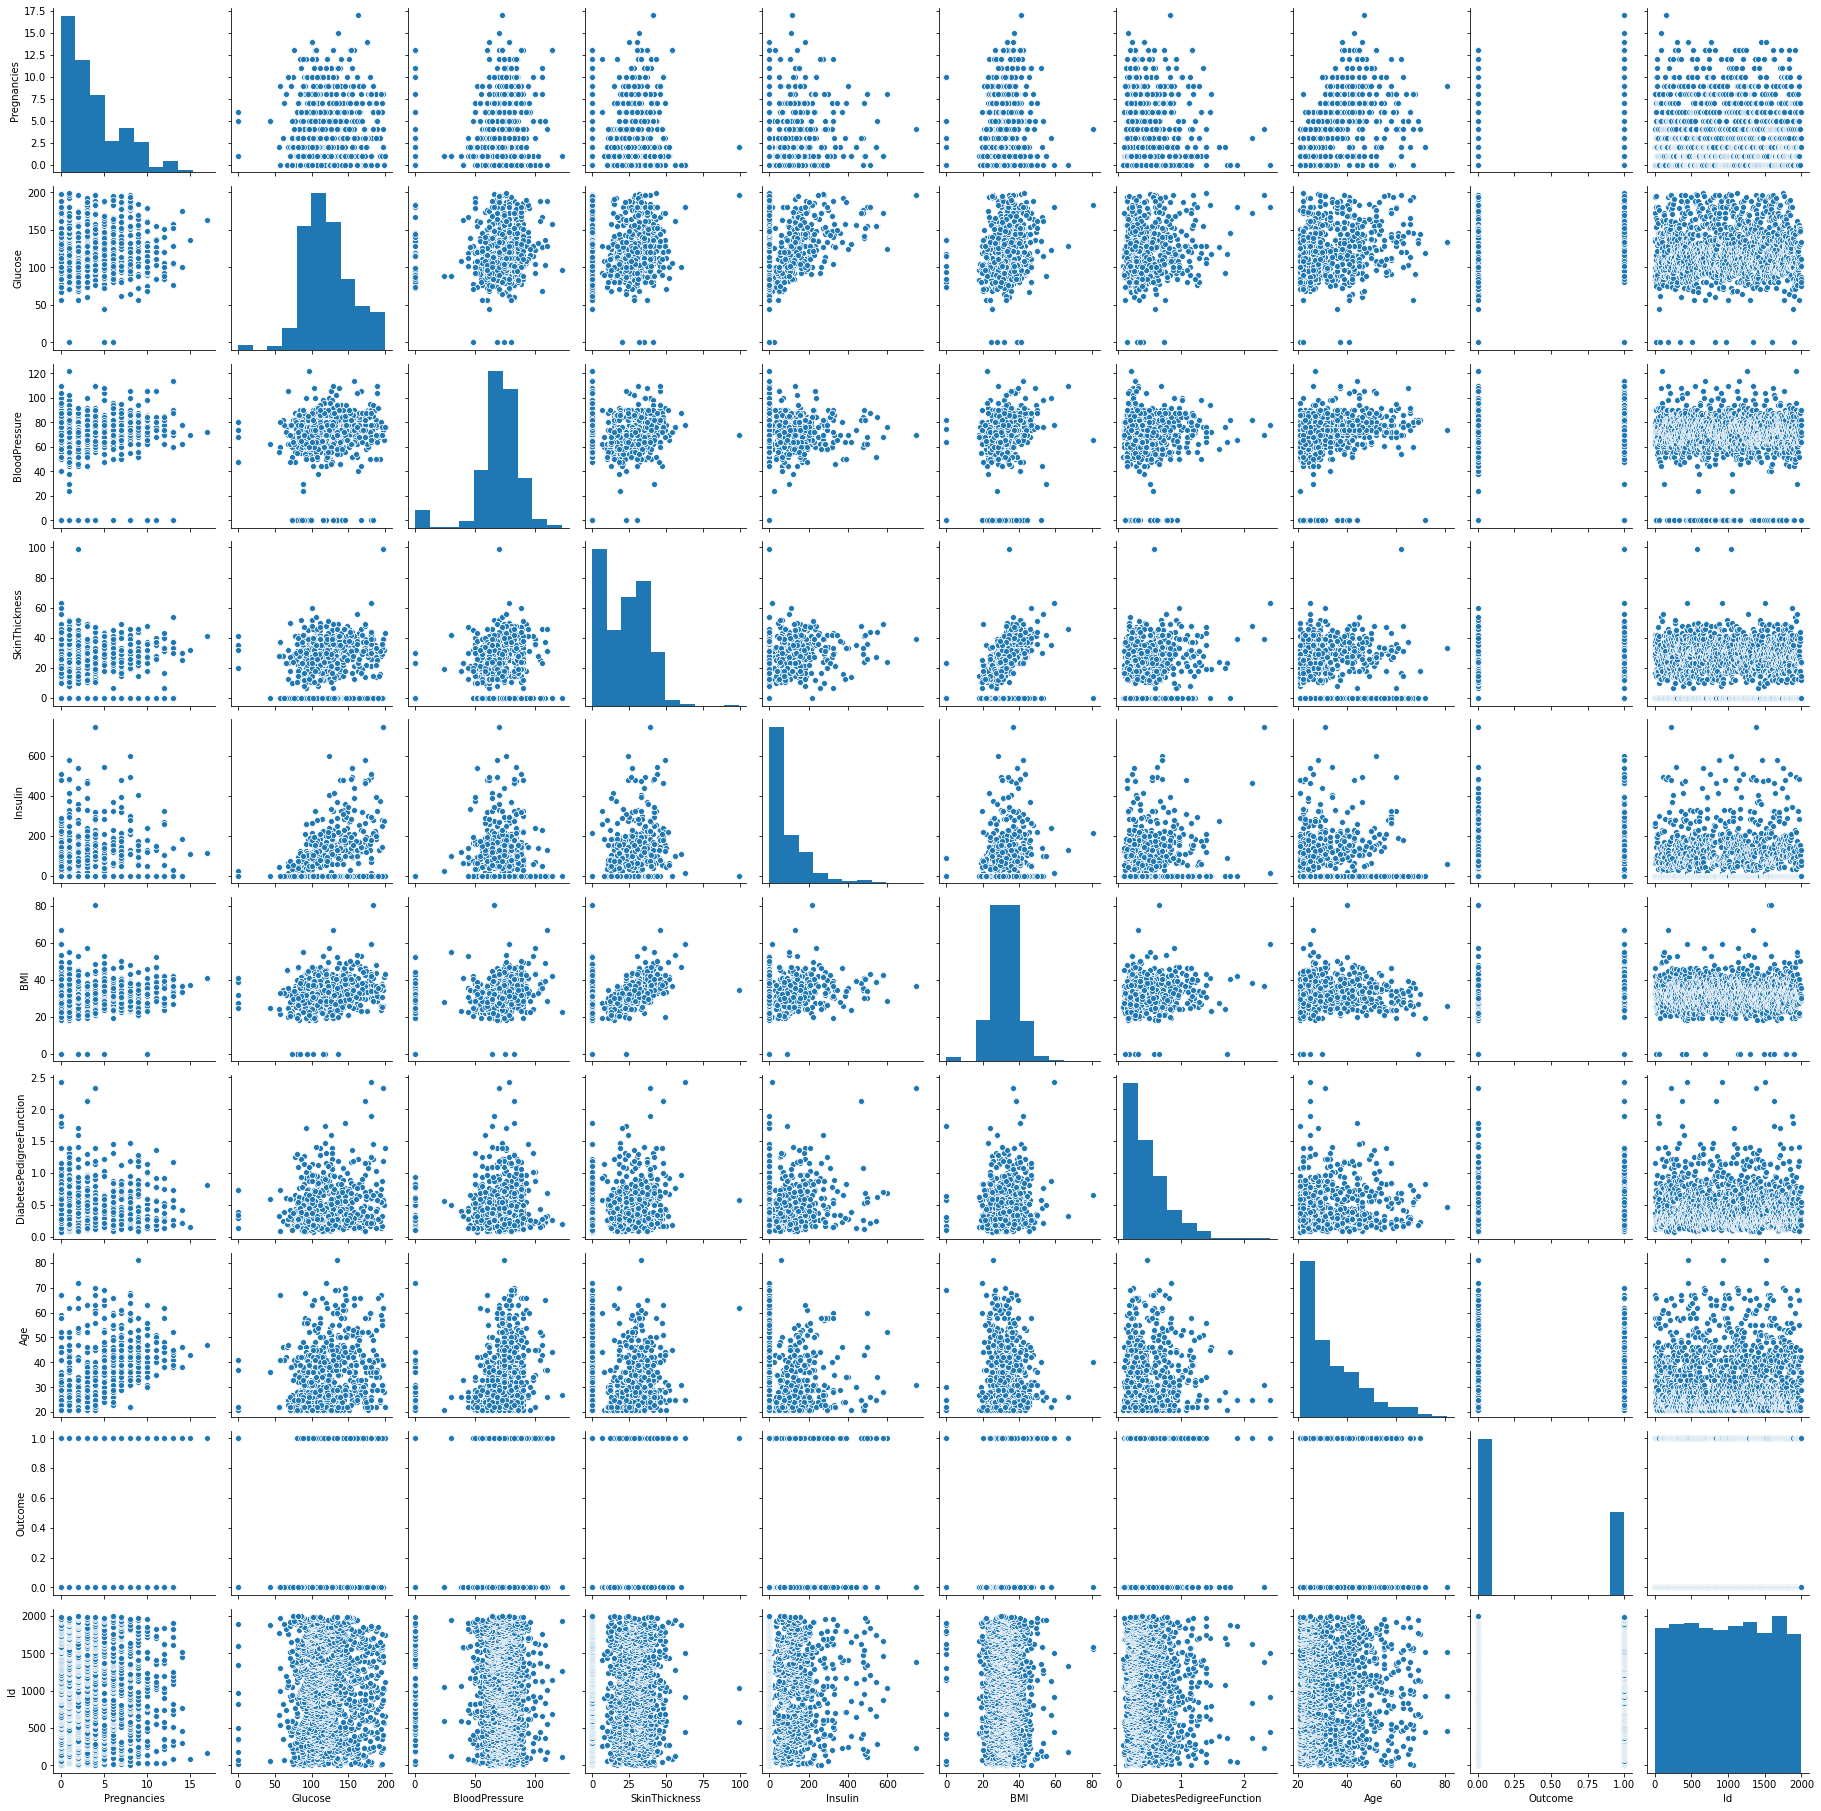

In [0]:
#Bivariate analysis
sns.distplot(data['Glucose'])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaler=scaler.fit_transform(data.drop('Outcome',axis=1))


In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,data['Outcome'],random_state=2)

In [0]:
from sklearn.metrics import accuracy_score
class accmodel:
  def __init__(self,model):
    self.model=model
  def train(self):
    self.model.fit(xtrain,ytrain)
    print('Model trained..........')
  def predict(self):
    predictions=self.model.predict(xtest)
    score=accuracy_score(ytest,predictions)
    return score


In [0]:
from sklearn.svm import SVC
svm=SVC()
model=accmodel(svm)
model.train()
s=model.predict()
print(s)


Model trained..........
0.7840909090909091


In [0]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
model=accmodel(log)
model.train()
s=model.predict()
print(s)


Model trained..........
0.7897727272727273


In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=accmodel(rfc)
model.train()
s=model.predict()
print(s)

Model trained..........
0.9232954545454546


In [0]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model=accmodel(xgb)
model.train()
s=model.predict()
print(s)

Model trained..........
0.8380681818181818


In [0]:
from sklearn.model_selection import RandomizedSearchCV
parameters=dict(C=[0.1,1,10],gamma=[1,10,100])
rcv=RandomizedSearchCV(svm,param_distributions=parameters)
model=rcv.fit(xtrain,ytrain)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [0]:
model.best_params_

{'C': 1, 'gamma': 1}

In [0]:
model.best_score_

0.7729722410291131

In [0]:
data.drop('Id',axis=1,inplace=True)

In [0]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,2,138,62,35,0,33.6,0.127,47,1,0
1,0,135,68,42,250,42.3,0.365,24,1,3
2,0,173,78,32,265,46.5,1.159,58,0,5
3,4,99,72,17,0,25.6,0.294,28,0,6
4,8,194,80,0,0,26.1,0.551,67,0,7


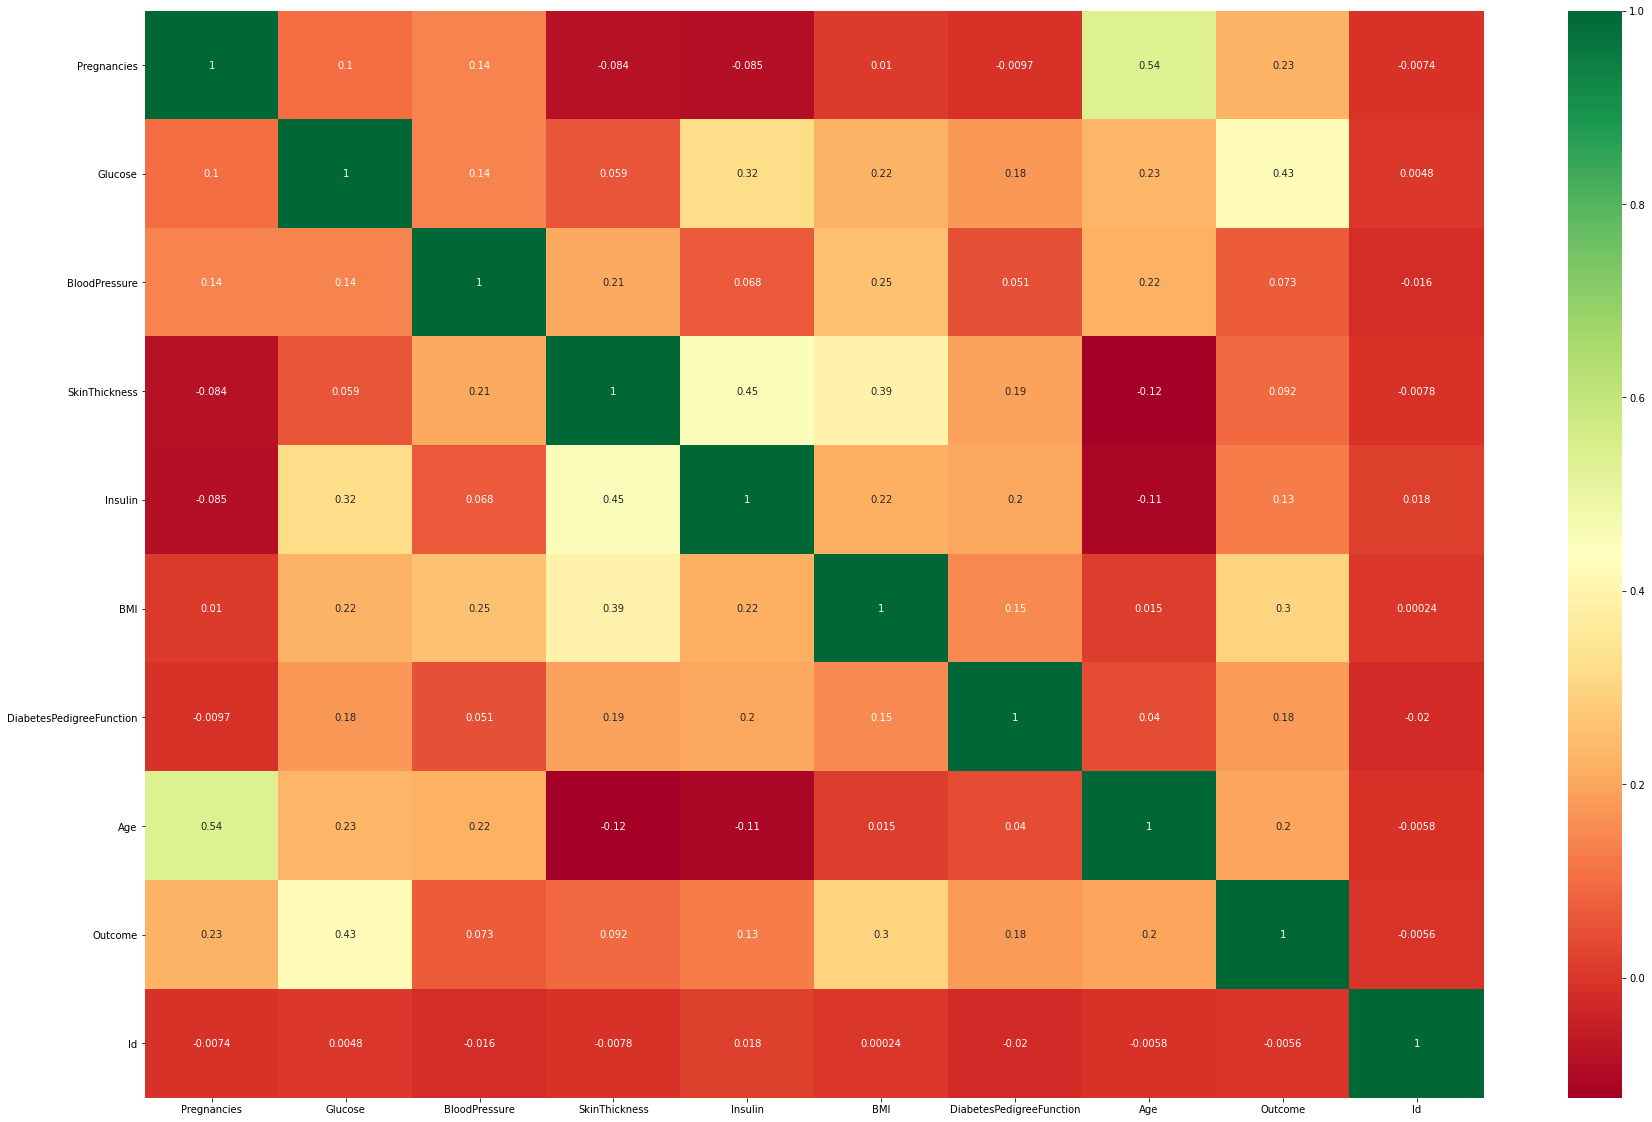

In [0]:
matrix=data.corr()
top_corr_feat=matrix.index
plt.figure(figsize=(30,20))
g=sns.heatmap(data[top_corr_feat].corr(),annot=True,cmap='RdYlGn')

In [0]:
#checking 0 values
print('Preganicies {}'.format(len(data.loc[data['Pregnancies']==0])))
print('Glucose {}'.format(len(data.loc[data['Glucose']==0])))
print('BloodPressure {}'.format(len(data.loc[data['BloodPressure']==0])))
print('SkinThickness {}'.format(len(data.loc[data['SkinThickness']==0])))
print('Insulin {}'.format(len(data.loc[data['Insulin']==0])))
print('BMI {}'.format(len(data.loc[data['BMI']==0])))
print('Age {}'.format(len(data.loc[data['Age']==0])))


Preganicies 209
Glucose 12
BloodPressure 57
SkinThickness 411
Insulin 690
BMI 15
Age 0


In [0]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=0,strategy='mean')
xtrain=impute.fit_transform(xtrain)
xtest=impute.fit_transform(xtest)

In [0]:
xtrain

array([[2.00000000e+00, 1.38000000e+02, 6.20000000e+01, ...,
        1.27000000e-01, 4.70000000e+01, 1.00000000e+00],
       [4.30852843e+00, 1.35000000e+02, 6.80000000e+01, ...,
        3.65000000e-01, 2.40000000e+01, 1.00000000e+00],
       [4.30852843e+00, 1.73000000e+02, 7.80000000e+01, ...,
        1.15900000e+00, 5.80000000e+01, 1.00000000e+00],
       ...,
       [2.00000000e+00, 7.50000000e+01, 6.40000000e+01, ...,
        3.70000000e-01, 3.30000000e+01, 1.00000000e+00],
       [6.00000000e+00, 8.50000000e+01, 7.80000000e+01, ...,
        3.82000000e-01, 4.20000000e+01, 1.00000000e+00],
       [2.00000000e+00, 8.10000000e+01, 7.20000000e+01, ...,
        5.47000000e-01, 2.50000000e+01, 1.00000000e+00]])

In [0]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [0]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [0]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [0]:
estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, 
                                           verbosity=1)

In [0]:
estimator.fit(xtrain,ytrain.ravel())
pred=estimator.predict(xtest)
print(accuracy_score(ytest,pred))

0.8380681818181818
